In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# Keep 10000 most frequently occurring words
# Training data is 25000
# Testing data is 25000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000, )

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.9/site-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.9/site-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object'

In [3]:
# Encode integer sequences into a binary SPARSE matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Create a matrix with all zeros
    
    # i is the count, sequence is the paragraph
    for i, sequence in enumerate(sequences):
        # For the i-th paragraph, map all the word ids to indexes in the zeros array and make them 1
        results[i, sequence] = 1 # Set some values to 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_train.shape

(25000,)

In [4]:
model = models.Sequential()
model.add(layers.Dense(32, activation=layers.LeakyReLU(alpha=0.1), input_shape=(10000,)))
model.add(layers.Dense(32, activation=layers.LeakyReLU(alpha=0.1)))
model.add(layers.Dense(32, activation=layers.LeakyReLU(alpha=0.1)))
model.add(layers.Dense(32, activation=layers.LeakyReLU(alpha=0.1)))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [6]:
# validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpqq876zan.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpqq876zan.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
30/30 [==============================] - 41s 219ms/step - loss: 0.1946 - accuracy: 0.7142 - val_loss: 0.0996 - val_accuracy: 0.8736
Epoch 2/4
30/30 [==============================] - 2s 53ms/step - loss: 0.0823 - accuracy: 0.8983 - val_loss: 0.0862 - val_accuracy: 0.8858
Epoch 3/4
30/30 [==============================] - 1s 35ms/step - loss: 0.0601 - accuracy: 0.9224 - val_loss: 0.08

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

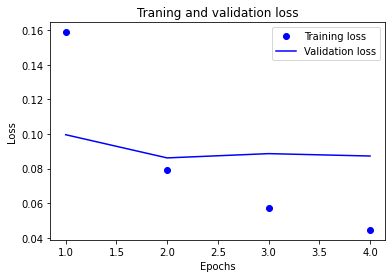

In [9]:
import matplotlib.pyplot as plt
import math

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1) # 1 to 21

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

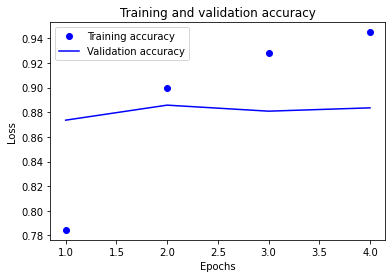

In [10]:
plt.clf() # Clear figure
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.0929 - accuracy: 0.8767


In [12]:
model.predict(x_test)

array([[0.15400961],
       [0.9987085 ],
       [0.90792036],
       ...,
       [0.12797904],
       [0.09533209],
       [0.8974848 ]], dtype=float32)